In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from scipy.stats import norm
import time
from numba import njit

In [2]:
I_0=np.array([[2/3,-1/4,-1/4],[-1/4,2/3,-1/4],[-1/4,-1/4,2/3]])

In [3]:
@njit()
def Inertia(p,i,j,N,dm):
  s=0
  
  if i==j:
    
    if i==0:
      for g in range(N):
         s+=(p[g][1]**2+p[g][2]**2)*dm
      return(s)
    
    if i==1:
      for g in range(N):
         s+=(p[g][0]**2+p[g][2]**2)*dm
      return(s)
    
    if i==2:
      for g in range(N):
         s+=(p[g][0]**2+p[g][2]**2)*dm
      return(s)
  
  else:
    if i==0 and j==1:
      for g in range(N):
        s+=dm*p[g][i]*p[g][j]
      return(-s)
    
    if i==0 and j==2:
      for g in range(N):
        s+=dm*p[g][i]*p[g][j]
      return(-s)
    
    if i==1 and j==0:
      for g in range(N):
        s+=dm*p[g][i]*p[g][j]
      return(-s)

    if i==1 and j==2:
      for g in range(N):
        s+=dm*p[g][i]*p[g][j]
      return(-s)

    if i==2 and j==0:
      for g in range(N):
        s+=dm*p[g][i]*p[g][j]
      return(-s)

    if i==2 and j==1:
      for g in range(N):
        s+=dm*p[g][i]*p[g][j]
      return(-s)   

In [4]:
def hist_plot(n,N):
  fig4,(ax1,ax2)=plt.subplots(1,2,facecolor='white')

  fig4.suptitle(r"Monte Carlo Simulation for Inetrtia Tensor of a Cube about X-axis"+'\n'+ "Total number of runs={}, Total number of points={}".format(n,N),fontsize=22)

  (mu,sigma)=norm.fit(I_xx)
  n, bins, patches = ax1.hist(I_xx,bins=69,histtype='step',density=True,color='b')
  y=norm.pdf(bins,mu,sigma)
  ax1.plot(bins,y,'r--',alpha=1)
  ax1.vlines(I_0[0][0],0,np.max(n)*1.1,'k')
  ax1.set_title(r'$I_{xx}=%.4e$, $\sigma=$%.4e'%(mu,sigma),fontsize=18)
  ax1.legend(['Fit','Monte carlo','Analytical'],frameon=False)
  ax1.set_ylim(0,np.max(n)*1.1)
  ax1.set_xlim((np.min(bins),np.max(bins)))
  ax1.set_xlabel(r"$I_{xx}$",fontsize=16)
  ax1.set_ylabel(r'$N$',fontsize=16)


  (mu,sigma)=norm.fit(-I_xy)
  n, bins, patches = ax2.hist(-I_xy,bins=69,histtype='step',density=True,color='b')
  y=norm.pdf(bins,mu,sigma)
  ax2.plot(bins,y,'r--',alpha=1)
  ax2.vlines(I_0[0][1],0,np.max(n)*1.1,'k')

  ax2.set_title(r'$I_{xy}=%.4e$, $\sigma=$%.4e'%(mu,sigma),fontsize=18)
  ax2.legend(['Fit','Monte carlo','Analytical'],frameon=False)
  ax2.set_ylim(0,np.max(n)*1.1)
  ax2.set_xlim((np.min(bins),np.max(bins)))
  ax2.set_xlabel(r'$I_{xy}$',fontsize=16)
  ax2.set_ylabel(r'$N$',fontsize=16)

  fig4.set_figheight(10)
  fig4.set_figwidth(15)

In [5]:
n=int(input("Enter number of runs: "))
N=int(input("Enter number of points: "))
t1=time.time()
I_xx=np.zeros(n)
I_xy=np.zeros(n)

e_xx=np.zeros(n)
e_xy=np.zeros(n)

for c in range(n):

  M=1

  dm=M/N

  p=np.zeros((N,3))

  I=np.zeros((3,3))

  #random points generator

  for i in range(N):
    p[i]=[rand.random(),rand.random(),rand.random()]

  for i in range(3):
    for j in range(3):
     I[i][j]=Inertia(p,i,j,N,dm)
  I_xx[c]=(I[0][0]+I[1][1]+I[2][2])/3
  I_xy[c]=abs(I[0][1]+I[0][2]+I[1][0]+I[1][2]+I[2][0]+I[2][1])/6
  e_xx[c]=abs(I_xx[c]-I_0[0][0])
  e_xy[c]=abs((I[0][1]+I[0][2]+I[1][0]+I[1][2]+I[2][0]+I[2][1])/6-I_0[0][1])
t2=time.time()
print("Time={}".format((t2-t1)))


Enter number of runs: 10000
Enter number of points: 10000
Time=232.33455204963684


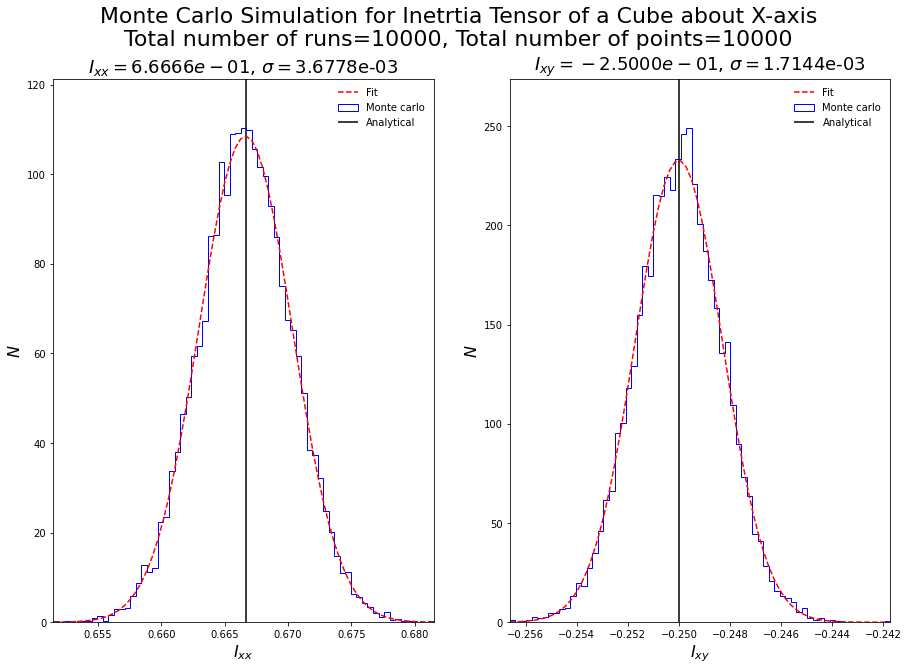

In [6]:
hist_plot(n,N)